### 1. Imports

In [1]:
# these are some Jupyter-specific settings. Only really relevant when drawing charts on high-res screens.
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# imports...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# declarative statsmodels
import statsmodels.formula.api as smf

# conventional statsmodels
import statsmodels.api as sm

# Plot styling
plt.style.use('ggplot')

### 2. Load Data

We use the same data-set and method as in Excercise 1 _(Load CSV Data)_

In [2]:
df = pd.read_excel('http://jse.amstat.org/v19n3/decock/AmesHousing.xls')

df = df.drop(columns=['PID', 'Order'])

# We don't want special characters in column headers
df.columns = [x.replace(' ', '') for x in df.columns]

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### 3. Examine the Data (correlations)

Python has some amazing plotting libraries available free of use. One of these is Seaborn _(built untop of Matplotlib)_, which is a statistical plotting tool.

Since we're doing simple regression, I'd say we'd be smart to see if we can model the saleprice of the house by the overall quality of the material and finish of the house. 

The results below clearly states that there are high positive levels of correlation between `OverallQual` our dependent variable `SalePrice`.

Thus we're interested in the following relationship:

$$\text{SalePrice}=\beta_0+\beta_1\cdot\text{OverallQual}+u$$

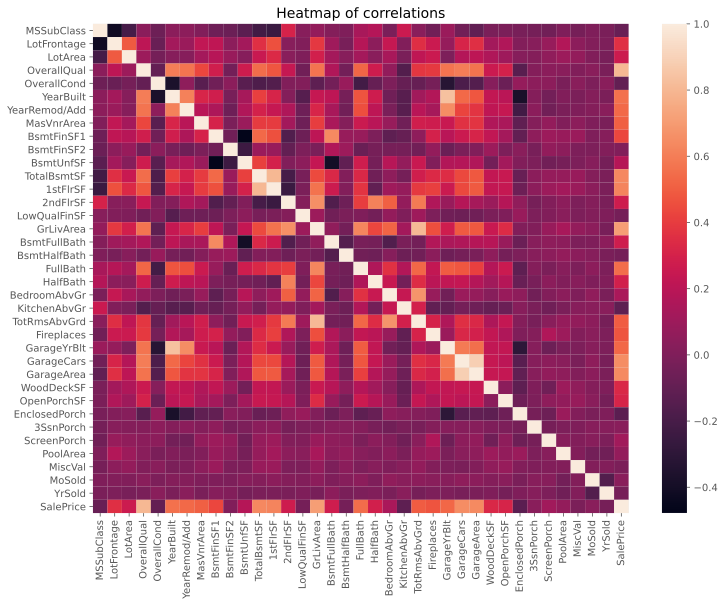

In [3]:
# Creates an empty figure to place the plot in. Only needed to have adjudsted size
plt.figure(figsize=(12,9))

# Set title of plot
plt.title('Heatmap of correlations', fontsize=14)

# Use the seaborn library to create the heatmap - passing the correlation between all variables as argument
sns.heatmap(df.corr(), annot=False, vmax=1)

# Explicitly show plot in-line (not required)
plt.show()

#### Plotting

Before we fit the model, let's look at the distributions of the given variables - again using the seaborn package.

* We find - quite as expected - that SalePrice is somewhat right-skewed and OverallQual some kind of near-normal distribution.

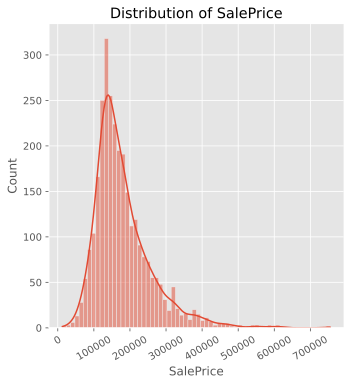

In [4]:
sns.displot(df['SalePrice'], kde=True)

# rotate x labels
plt.xticks(rotation=30)
plt.title('Distribution of SalePrice')

plt.show()

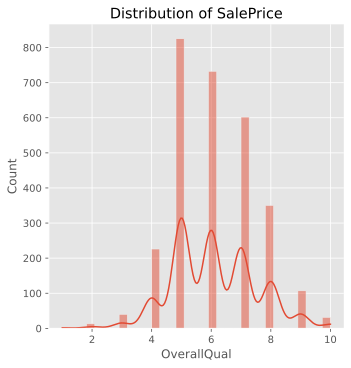

In [5]:
sns.displot(df['OverallQual'], kde=True)

plt.title('Distribution of SalePrice')

plt.show()

### 4. Fitting the model

Let's fit the model and see, which dependancy or significance we find.

Using the statsmodels package and it's OLS class, we can get a standard Stata-like output right in the Jupyter notebook.

In [6]:
# statsmodels uses this super cool R-like declarative formula model for model-specification.
reg = smf.ols('SalePrice ~ OverallQual', data=df).fit()

# summary yields classic "stata-like" regression output
reg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
==========================================================================
Model:                 OLS                Adj. R-squared:       0.639     
Dependent Variable:    SalePrice          AIC:                  71483.9507
Date:                  2020-09-30 21:28   BIC:                  71495.9163
No. Observations:      2930               Log-Likelihood:       -35740.   
Df Model:              1                  F-statistic:          5179.     
Df Residuals:          2928               Prob (F-statistic):   0.00      
R-squared:             0.639              Scale:                2.3058e+09
--------------------------------------------------------------------------
               Coef.     Std.Err.    t     P>|t|     [0.025       0.975]  
--------------------------------------------------------------------------
Intercept   -95003.5515 3933.8222 -24.1504 0.0000 -102716.8898 -87290.2131
OverallQual  45251.0282  628.8051  71.9635 0.0000   44018.0832  46483.9732
--------------------------------------------------------------------------
Omnibus:                953.364         Durbin-Watson:            1.398   
Prob(Omnibus):          0.000           Jarque-Bera (JB):         6610.719
Skew:                   1.362           Prob(JB):                 0.000   
Kurtosis:               9.836           Condition No.:            28      
==========================================================================

"""

In [7]:
# statsmodels can also be used by passing the variables as vectors/pandas series - results are invariant
y = df['SalePrice']
X = df['OverallQual']

# add constant to X matrix
X = sm.add_constant(X)

reg = sm.OLS(endog=y, exog=X).fit()

reg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
==========================================================================
Model:                 OLS                Adj. R-squared:       0.639     
Dependent Variable:    SalePrice          AIC:                  71483.9507
Date:                  2020-09-30 21:28   BIC:                  71495.9163
No. Observations:      2930               Log-Likelihood:       -35740.   
Df Model:              1                  F-statistic:          5179.     
Df Residuals:          2928               Prob (F-statistic):   0.00      
R-squared:             0.639              Scale:                2.3058e+09
--------------------------------------------------------------------------
               Coef.     Std.Err.    t     P>|t|     [0.025       0.975]  
--------------------------------------------------------------------------
const       -95003.5515 3933.8222 -24.1504 0.0000 -102716.8898 -87290.2131
OverallQual  45251.0282  628.8051  71.9635 0.0000   44018.0832  46483.9732
--------------------------------------------------------------------------
Omnibus:                953.364         Durbin-Watson:            1.398   
Prob(Omnibus):          0.000           Jarque-Bera (JB):         6610.719
Skew:                   1.362           Prob(JB):                 0.000   
Kurtosis:               9.836           Condition No.:            28      
==========================================================================

"""

#### Interpretation

We see from the regression output, that we have a reasonably high $R^2$ and that everything is quite significant. There may be some major _omitted variable bias_ though - but we'll cover this in the next chapter when we talk about multivariate regression.

If we're interested in grahically illustrating this simple relationsship, we can use the `regplot` tool from the Seaborn package - we also see here, that the linear relationsship is quite strong.

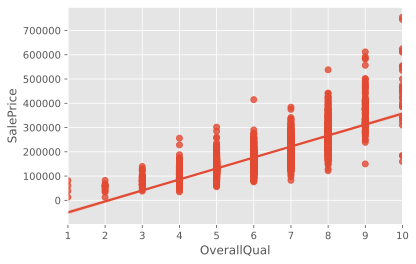

In [8]:
sns.regplot(x='OverallQual', y='SalePrice', data=df)
plt.show() 

### 5. Manual Calculation (OLS)

We can alternatively calculate the OLS for simple regression manually using python as well. Fortunetly we won't need any linear algebra for simple regression.

If we consider the OLS estimator of $\beta_0$ and $\beta_1$ and we define the residual $\hat{u}_{i}=\left(b_{0},b_{1}\right)$ where we use $\left(b_{0},b_{1}\right)$ as estimates for $\left(\beta_{0},\beta_{1}\right).$ we can then express our residuals as,

$$\hat{u}_{i}\left(b_{0},b_{1}\right)=y_{i}-\left(b_{0}+b_{1}x_{i}\right)$$

The OLS estimator $\left(\hat{\beta}_{0},\hat{\beta}_{1}\right)$ are the values of $\left(b_{0},b_{1}\right)$ that minimize the sum of squared residuals

$$\min_{b_{0},b_{1}}\sum_{i=1}^{n}\left[y_{i}-\left(b_{0}+b_{1}x_{i}\right)\right]^{2}$$

This yields the following FOC's,


\begin{align*}
    \frac{\partial\sum_{i=1}^{n}\left[y_{i}-\left(\widehat{\beta}_{0}+\widehat{\beta}_{1}x_{i}\right)\right]^{2}}{\partial b_{0}}&=0 \\
    \frac{\partial\sum_{i=1}^{n}\left[y_{i}-\left(\widehat{\beta}_{0}+\widehat{\beta}_{1}x_{i}\right)\right]^{2}}{\partial b_{1}}&=0
\end{align*}

Solving the FOC's we get,

\begin{align*}
    -2\sum_{i=1}^{n}\left[y_{i}-\left(\widehat{\beta}_{0}+\widehat{\beta}_{1}x_{i}\right)\right]&=0 \\
    -2\sum_{i=1}^{n}x_{i}\left[y_{i}-\left(\widehat{\beta}_{0}+\widehat{\beta}_{1}x_{i}\right)\right]&=0
\end{align*}


If we apply both some algebra and statistical assumptions we're left with expressions for both $\widehat{\beta}_{0}$ and $\widehat{\beta}_{1}$.

\begin{align*}
    \widehat{\beta}_{1}&=\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}} \\
    \hat{\beta}_{0}&=\bar{y}-\hat{\beta}_{1}\bar{x},\text{ where }\bar{y}\equiv\frac{1}{n}\sum y_{i}\text{ and }\bar{x}\equiv\frac{1}{n}\sum x_{i}
\end{align*}


__Anyhow__ combining these results, we're left with the following linear equation,

$$\hat{y}=\hat{\beta}_{0}+\hat{\beta}_{1}x$$

Let's try it out.

In [9]:
# Using Numpy vectors make all these calculations super easy because calculations are run on all elements in the vector
x_i = df['OverallQual'].to_numpy()
y_i = df['SalePrice'].to_numpy()

x_bar = np.mean(df['OverallQual'])
y_bar = np.mean(df['SalePrice'])

beta_hat_1 = ((x_i - x_bar) * (y_i - y_bar)).sum() / np.power((x_i - x_bar), 2).sum()
beta_hat_0 = y_bar - beta_hat_1 * x_bar

print(f'Beta_1: {round(beta_hat_1, 2)}')
print(f'Beta_0: {round(beta_hat_0, 2)}')

Beta_1: 45251.03
Beta_0: -95003.55


#### Results

As one can see we get the exact same results for our beta-estimates as when we ran the statsmodels regression package earlier.